****Introduction****

The Amazon Top 50 Bestselling Books (2009-2019) dataset contains information about the top 50
bestselling books in the United States over a 10-year period.

In this project, you will perform Exploratory Data Analysis (EDA) on the Amazon Top 50 Bestselling
Books (2009-2019) dataset.

In [1]:
#importation of the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
amazon= pd.read_csv("/content/drive/MyDrive/data/bestsellers with categories.csv")


In [37]:
amazon.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Sales,Name Length
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,138800,29
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,45144,17
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,284685,39
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,128544,22
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,91980,66



**Assessing the Data**

In [5]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [ ]:
amazon.shape

(550, 7)

In [6]:
# colums of Data
amazon.columns.to_list()

['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre']

In [7]:
# describe of data
amazon.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000



**Data cleaning**


In [8]:
amazon.isnull().sum()

,0
Name,0
Author,0
User Rating,0
Reviews,0
Price,0
Year,0
Genre,0


In [9]:
amazon.duplicated().sum()

0

This data does not need to cleaning.. Does not contain (isNULL, duplicated, ...)




*Convert the data type of columns to the correct type*


In [10]:
amazon['Author'] = amazon['Author'].astype('category')
amazon['Genre'] = amazon['Genre'].astype('category')
amazon['Price'] = pd.to_numeric(amazon['Price'], errors='coerce')
amazon['User Rating'] = pd.to_numeric(amazon['User Rating'], errors='coerce')

In [11]:
#How much of Authors in Data
len(amazon["Author"].unique().tolist())

248

In [12]:
amazon["Genre"].unique().tolist()

['Non Fiction', 'Fiction']

In [13]:
#Order of years in Amazon Data
amazon_year_sort=amazon["Year"].unique().tolist()
amazon_year_sort.sort()
print(amazon_year_sort)

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [14]:
# New column ( Sales )
amazon['Sales']=amazon['Reviews']*amazon['Price']

In [15]:
## New column ( Name Length)
book_title_length = [len(name) for name in amazon['Name']]
amazon['Name Length'] = book_title_length
# We have created a new column "Name Length" We have created this column to test if there is a relationship between Name Length and other columns

In [16]:
amazon.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Sales,Name Length
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,138800,29
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,45144,17
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,284685,39
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,128544,22
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,91980,66


In [17]:
amazon.sort_values(by=["Year"],ascending=True)

,Name,Author,User Rating,Reviews,Price,Year,Genre,Sales,Name Length
177,"I, Alex Cross",James Patterson,4.6,1320,7,2009,Fiction,9240,13
131,Glenn Beck's Common Sense: The Case Against an...,Glenn Beck,4.6,1365,11,2009,Non Fiction,15015,98
417,The Last Lecture,Randy Pausch,4.7,4028,9,2009,Non Fiction,36252,16
241,New Moon (The Twilight Saga),Stephenie Meyer,4.6,5680,10,2009,Fiction,56800,28
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction,57555,45
...,...,...,...,...,...,...,...,...,...
150,Guts,Raina Telgemeier,4.8,5476,7,2019,Non Fiction,38332,4
466,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.6,26490,15,2019,Non Fiction,397350,86
462,The Silent Patient,Alex Michaelides,4.5,27536,14,2019,Fiction,385504,18
130,"Girl, Wash Your Face: Stop Believing the Lies ...",Rachel Hollis,4.6,22288,12,2019,Non Fiction,267456,106


**Exploratory Data Analysis**


In [18]:
print(amazon['Genre'].value_counts())
amazon['Genre'].value_counts(normalize=True)*100
# After calculating the number of books in each category, the number was converted into percentages for best of presentation

Genre
Non Fiction    310
Fiction        240
Name: count, dtype: int64


,proportion
Genre,
Non Fiction,56.363636
Fiction,43.636364


**Distribution of Genre for the  Books**

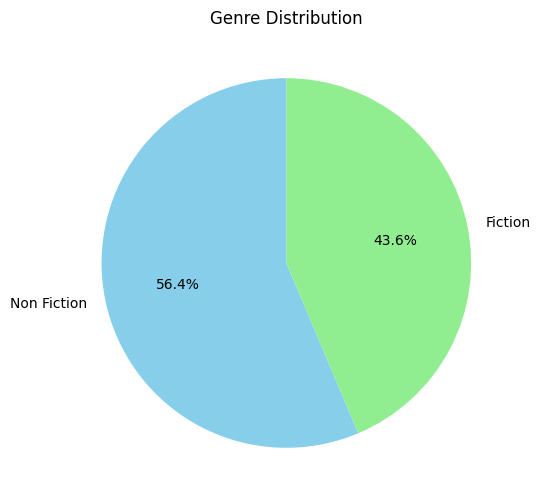

In [20]:
#Data
labels = ['Non Fiction', 'Fiction']
sizes = [310, 240]

# pie chart size and colors
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Genre Distribution')
plt.show()

The chart implies that both Fiction and Non-Fiction genres are popular, but Non-Fiction slightly outpaces Fiction in terms of representation in the bestselling books.


**Yearly Distribution of Reviews by Genre (Fiction vs. Non-Fiction)**

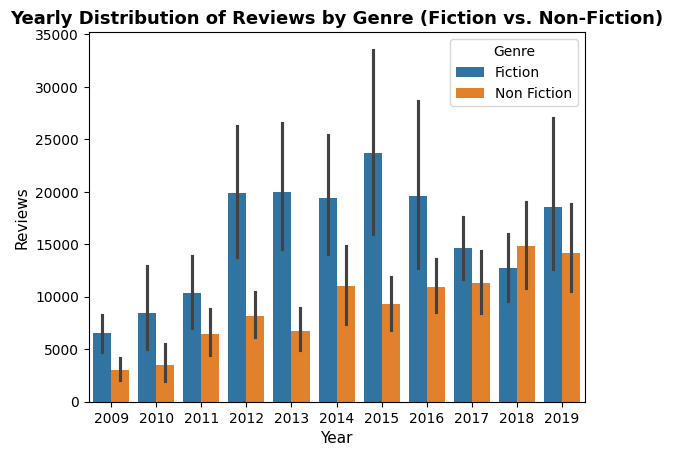

In [21]:
sns.barplot(data=amazon,x="Year",y='Reviews',hue='Genre')
plt.title('Yearly Distribution of Reviews by Genre (Fiction vs. Non-Fiction)',fontsize=13,weight='bold',color='black',loc='center')
plt.xlabel('Year',fontsize=11)
plt.ylabel('Reviews',fontsize=11)
plt.show()

This chart provides insights into how user engagement (measured by reviews) trends over time and compares between Fiction and Non-Fiction books.
 It can be used to analyze popularity and demand for these genres over the years.


Note:- The black lines at the top of the bars likely represent the standard deviation or variance in the data

**Avarge sales of books by years**


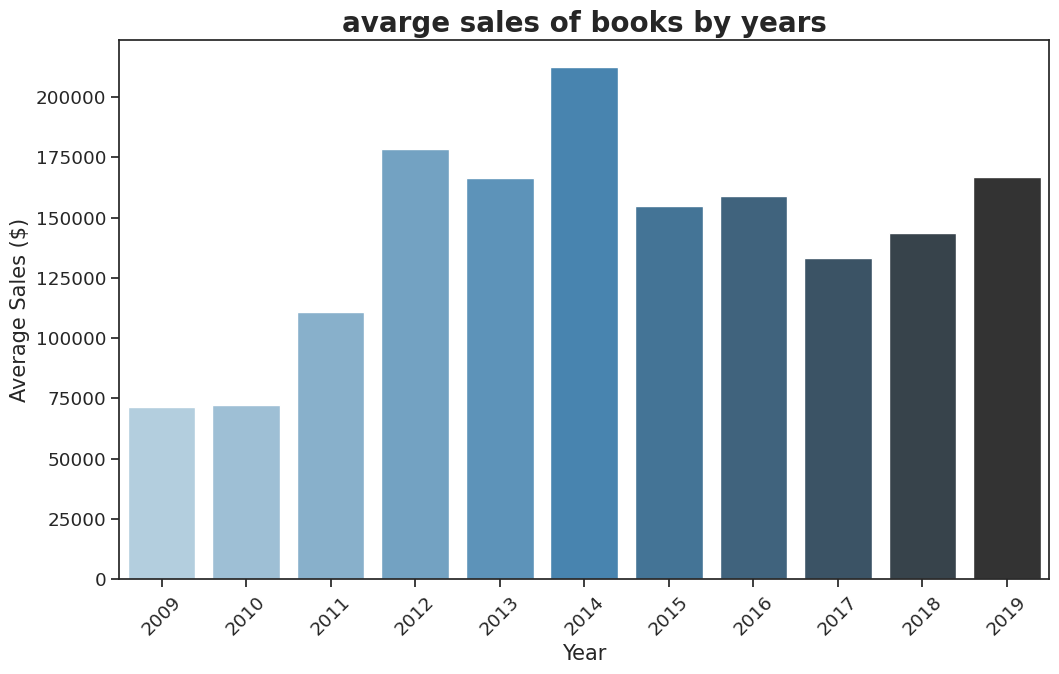

In [112]:
sns.barplot(x='Year', y='Sales', hue='Year', data=amazon, palette="Blues_d", errorbar=('ci', 0), legend=False)
plt.ylabel('Average Sales ($)', fontsize=15, loc='center')
plt.xlabel('Year', fontsize=15, loc='center')
plt.title('Avarge sales of books by years', fontsize=20, weight='bold', loc='center')
plt.xticks(rotation=45)
plt.show()

The chart illustrates the relationship between years  and the corresponding average sales in dollars of books over time. Each bar represents the total or average sales for a particular year.
where that 2014 had the highest average sales

<Axes: >

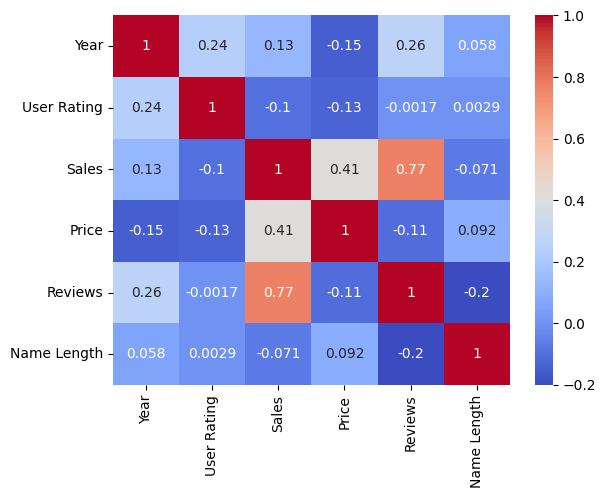

In [44]:
corr=amazon[['Year','User Rating','Sales','Price','Reviews','Name Length']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',)
#Relations with numeric columns

To see if there is a strong or weak relationship between numeric columns !

there some relations appear that strong postive and the other negative


**Authors with the Highest-Priced Bestsellers**

<ipython-input-38-eb5f31a22631>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amazon.groupby(['Author'],)['Price'].mean().nlargest(10).plot(kind='barh',figsize=(8, 6))


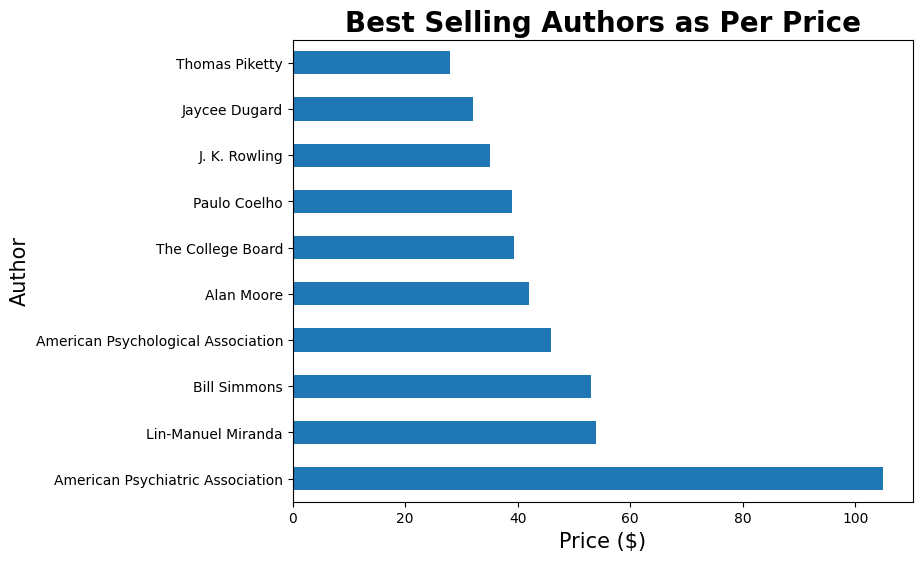

In [38]:
amazon.groupby(['Author'],)['Price'].mean().nlargest(10).plot(kind='barh',figsize=(8, 6))
plt.ylabel('Author', fontsize=15,loc='center')
plt.xlabel('Price ($)', fontsize=15,loc='center')
plt.title('Best Selling Authors as Per Price', fontsize = 20,weight='bold',color='black',loc='center')
plt.show()

This bar chart displays the top 10 authors whose books have the highest average prices among Amazon's bestselling books from 2009 to 2019. Each bar represents an author and the corresponding average price of their books (in USD)

**Most Of Reviewed Authors and Books**

In [119]:
amazon.groupby(['Author'])['Reviews'].mean().nlargest(10)

<ipython-input-119-55a9c7de34eb>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Reviews
Author,
Delia Owens,87841.0
Paula Hawkins,79446.0
Michelle Obama,61133.0
Gillian Flynn,57271.0
Kristin Hannah,49288.0
John Green,42083.8
Andy Weir,39459.0
Anthony Doerr,36348.0
Paulo Coelho,35799.0


In [43]:
amazon.groupby('Name')['Reviews'].mean().nlargest(10)
#Reviews  of Books

,Reviews
Name,
Where the Crawdads Sing,87841.0
The Girl on the Train,79446.0
Becoming,61133.0
Gone Girl,57271.0
The Fault in Our Stars,50482.0
The Nightingale: A Novel,49288.0
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series),47265.0
The Martian,39459.0
All the Light We Cannot See,36348.0


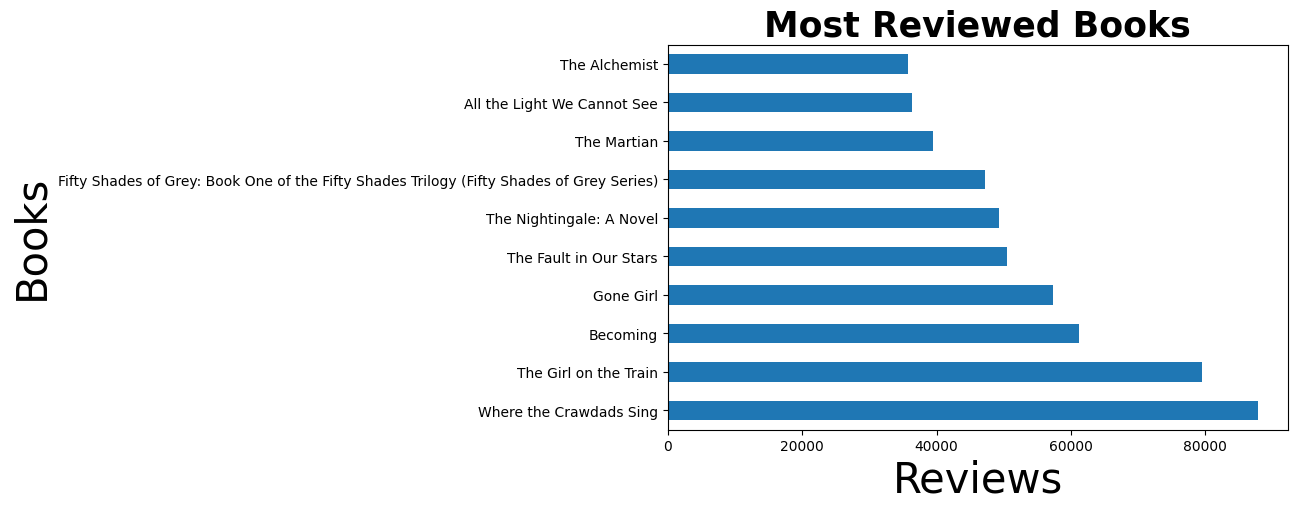

In [39]:
amazon.groupby('Name')['Reviews'].mean().nlargest(10).plot(kind='barh',figsize=(8, 5))
plt.ylabel('Books', fontsize=30)
plt.xlabel('Reviews', fontsize=30)
plt.title('Most Reviewed Books', fontsize = 25,weight='bold')
plt.show()

We can see that the top best selling books based on user ratings had Where the Crawdads Sing, The Girl on the Train, Becoming, and Gone Girl as the top 4 books.

And that is the "Where The Crawdads Sing" is the top with the highest average number of reviews of about 87841 reviews.

<ipython-input-41-7f93fb547306>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amazon.groupby('Author')['Reviews'].mean().nlargest(10).plot(kind="barh")


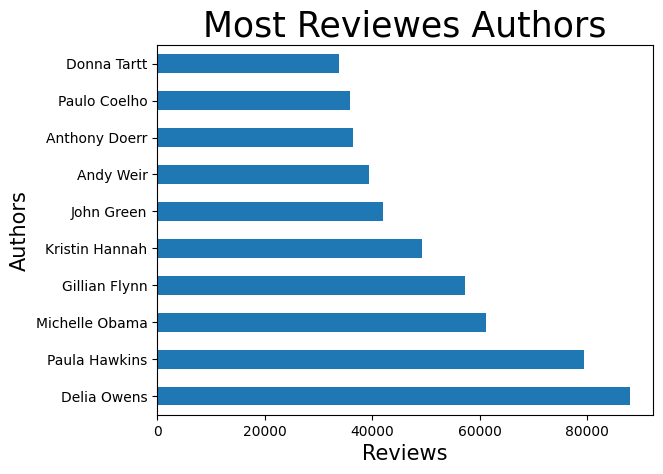

In [41]:
amazon.groupby('Author')['Reviews'].mean().nlargest(10).plot(kind="barh")
plt.ylabel('Authors', fontsize=15)
plt.xlabel('Reviews', fontsize=15)
plt.title('Most Reviewes Authors', fontsize = 25,loc='center')
plt.show()

This chart shows the most popular authors based on the number of reviews their books received. It highlights which authors are the most talked about and widely read by audiences.

 This information can help recommend popular books or understand which writers readers like the most.




**Top 10 books by sales**

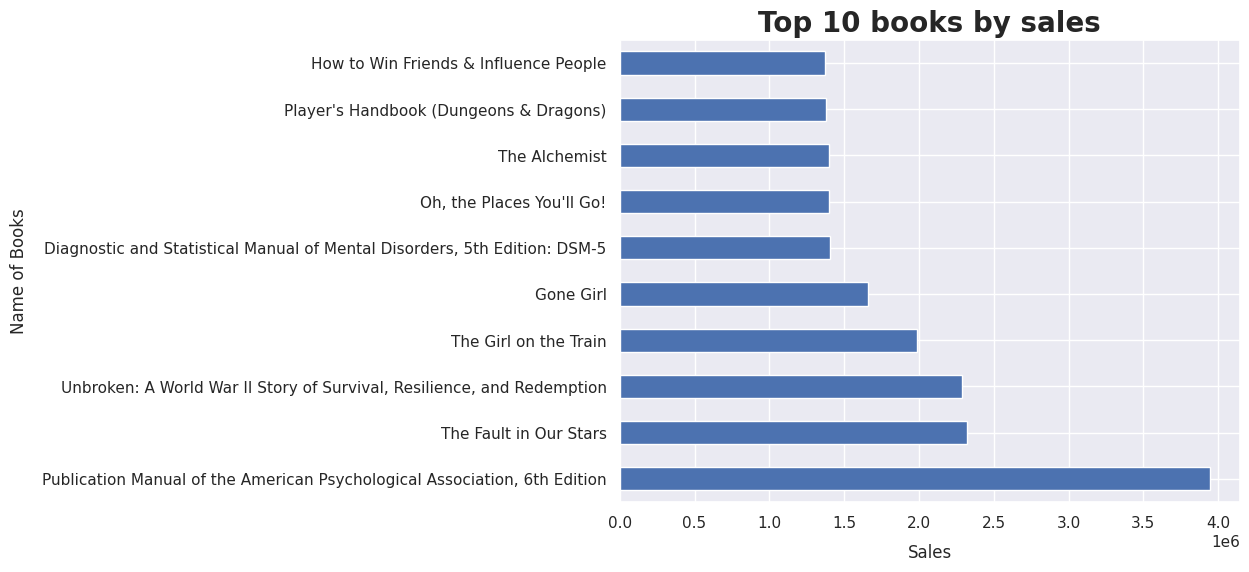

In [42]:
amazon.groupby(['Name'])['Sales'].sum().nlargest(10).plot(kind='barh',figsize=(8, 6))

plt.title('Top 10 books by sales', fontsize = 20,weight='bold',loc='center')
plt.xlabel('Sales',labelpad=10)
plt.ylabel('Name of Books',labelpad=10)
plt.show()

The Publication Manual of the American Psychological Association, 6th Edition has the highest sales among all the books, significantly outperforming the others.
This suggests its widespread use, possibly as a required reference in academic and professional settings

**Top 10 Authors
Based on Number of Times Their Books Appeared in Best Selling Listings**

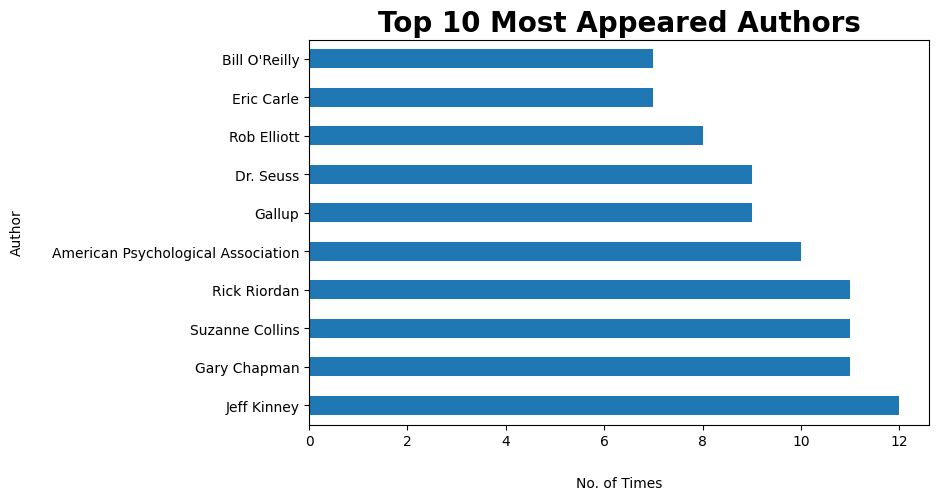

In [28]:
author_top=amazon['Author'].value_counts().nlargest(10)
author_top.plot(kind='barh',figsize=[8, 5])
plt.title('Top 10 Most Appeared Authors',weight='bold', fontsize = 20)
plt.xlabel('No. of Times',labelpad=20,loc='center')
plt.ylabel('Author',labelpad=20,loc='center')
plt.show()

Generally, regardless of Genre or category, (Jeff Kinney, Gary Chapman and Suzanne Collins) were top best selling authors from the top 10 most occuring authors.

**Top 10 Most Appeared Books**


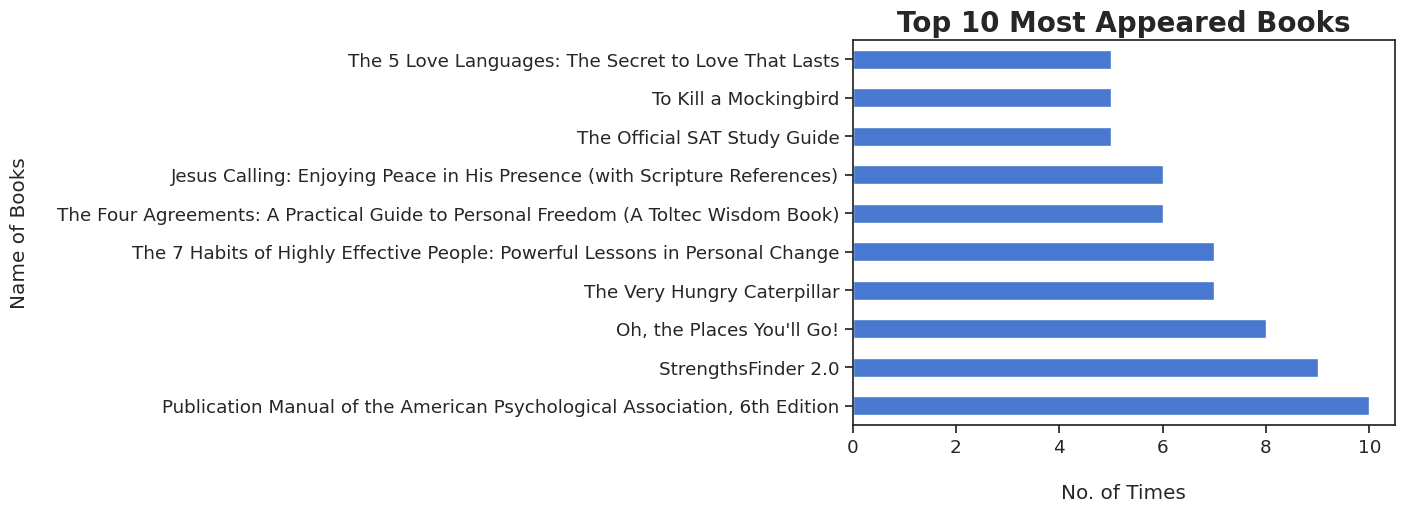

In [109]:
Books_top=amazon['Name'].value_counts().nlargest(10)
Books_top.plot(kind='barh',figsize=(7, 5),color="b")
plt.title("Top 10 Most Appeared Books", weight='bold', fontsize=20,loc='center')
plt.xlabel('No. of Times',labelpad=20)
plt.ylabel('Name of Books',labelpad=20)
plt.show()


Generally, regardless of Genre, Publication Manual of the "American Psychology Assscoiation"," 6th Edition", "StrengthsFinder 2.0"," Oh..", the Places You'll Go! were the top best selling books from the to 10 most occuring books

**Highest Rated Books**




<ipython-input-33-441628825900>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_wise = pd.DataFrame(amazon.groupby(['Name', 'Author'])['User Rating'].mean())


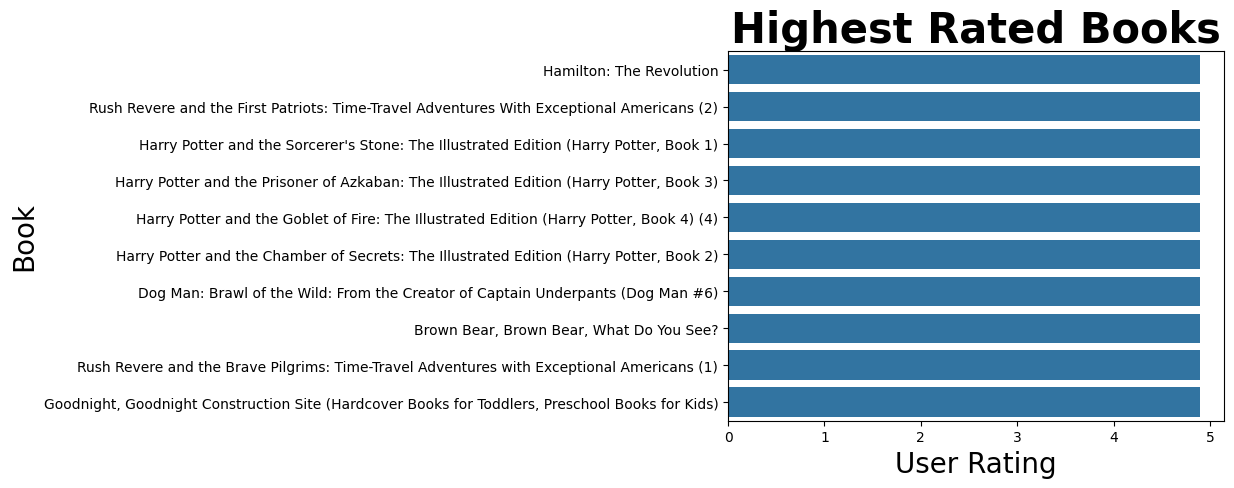

In [33]:
# Group by name, author, based on user rating.
rating_wise = pd.DataFrame(amazon.groupby(['Name', 'Author'])['User Rating'].mean())
rating_wise.reset_index(inplace=True)

# sort values in descending order based on rating
rating_wise = rating_wise.sort_values(by='User Rating', ascending=False)
rating_wise.head(10)

sns.barplot(data=rating_wise.head(10), x='User Rating', y='Name')
plt.ylabel('Book', fontsize=20)
plt.xlabel('User Rating', fontsize=20)
plt.title('Highest Rated Books', fontsize = 30,weight='bold')
plt.show()

The top ten books based on user rating had more than 4.5 stars in their user ratings

** **

**Relationship Between Book Title Length and User Ratings**

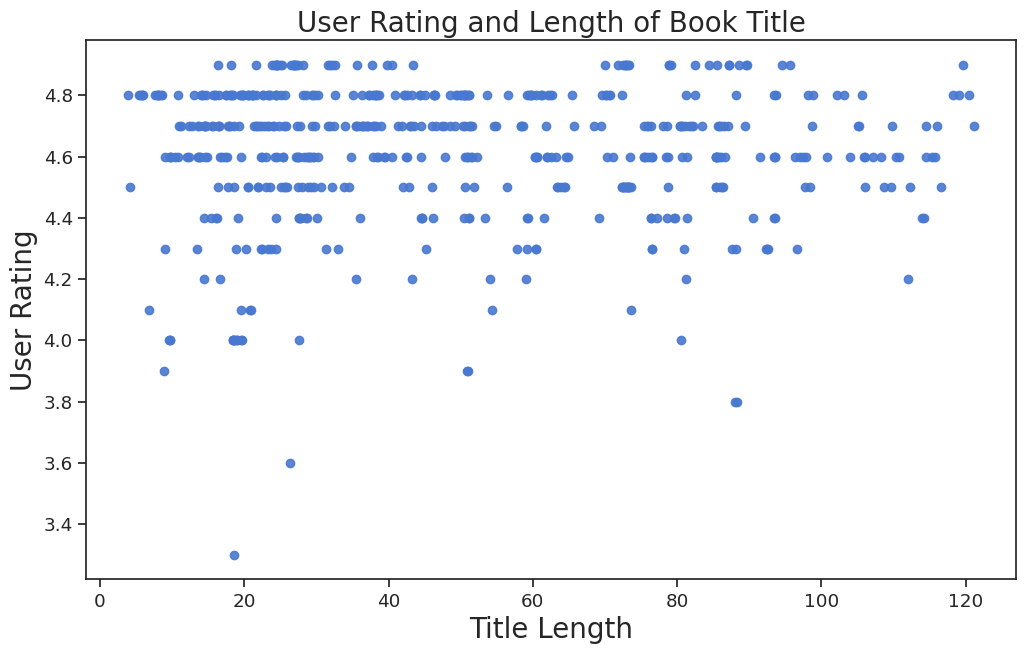

In [110]:
sns.regplot(data=amazon, x='Name Length', y='User Rating', x_jitter=0.7, fit_reg=False, scatter_kws={'alpha':0.9})
plt.title('User Rating and Length of Book Title', fontsize=20)
plt.ylabel('User Rating', fontsize=20)
plt.xlabel('Title Length', fontsize=20)
plt.show()


we can analyze whether there is any correlation between title length and user satisfaction

There is almost no clear relationship between name length and user ratings

**Words Cloud**

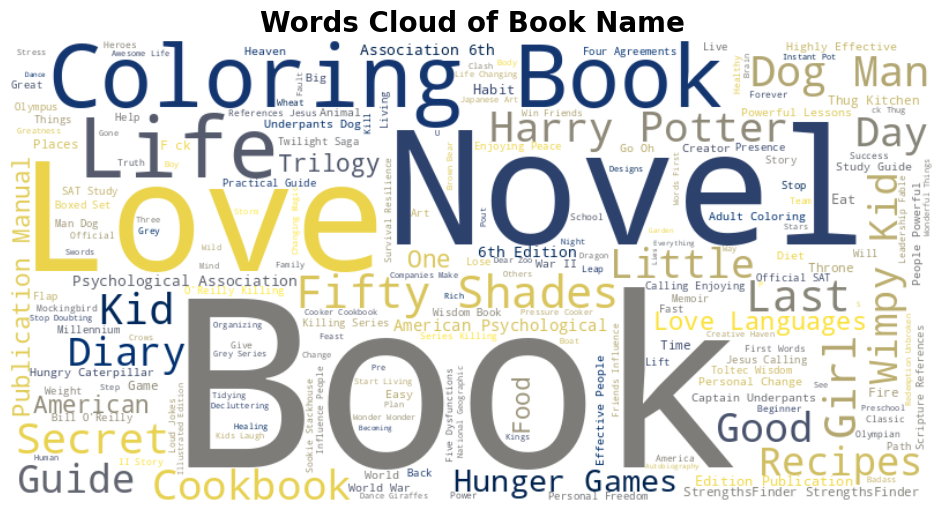

In [45]:
from wordcloud import WordCloud, STOPWORDS  #import worldcloud ,stopwards from library worldcloud

Names_of_books = " ".join(amazon['Name'])  #make spacebar or blank between the Name of books and combine them in parameter (string)

Filter_stopwords = set(STOPWORDS).union({"the", "and", "of"}) #words fillter with union ("the , and , of")
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=Filter_stopwords,
    colormap='cividis'
).generate(Names_of_books)  #create a word cloud from a given parameter (Names_of_books)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear') #to make the figure more smooth
plt.axis('off')
plt.title("Words Cloud of Book Name", fontsize=20,weight="bold")
plt.show()

words cloud is a visual representation of text data, typically used to highlight the frequency or importance of words in a dataset. The more frequently a word appears in the data, the larger and bolder it appears in the word cloud. So we can see that the most three words frequency "Novel , Book , Love"

In [36]:
from wordcloud import STOPWORDS

#example of words that we need to fillter it
# Convert STOPWORDS to a set
default_stopwords = list(STOPWORDS)


print(default_stopwords)

['and', 'ever', "when's", 'should', 'did', "they've", 'you', 'could', 'any', 'if', 'it', "she's", "that's", 'was', 'me', 'of', "you're", 'above', 'else', 'those', 'ours', 'like', 'own', 'too', "he's", 'k', 'since', "wouldn't", 'each', "who's", 'only', "mustn't", 'below', 'having', "won't", 'an', 'for', "we're", 'such', 'yourself', 'whom', 'just', 'been', "hadn't", "i'd", 'during', 'there', 'under', 'from', "she'll", 'then', 'hence', 'were', 'other', 'their', 'himself', "isn't", 'ought', 'into', 'a', "we'll", 'being', 'all', 'do', "aren't", 'that', 'are', 'however', "wasn't", 'ourselves', 'r', "he'll", 'to', 'once', 'myself', 'who', 'does', "here's", 'theirs', 'than', "why's", "they're", 'off', "shan't", 'some', 'in', 'the', "let's", 'while', 'over', 'more', 'therefore', 'yourselves', 'up', 'why', "you'd", "you'll", 'very', 'because', "hasn't", 'not', "they'd", 'we', 'they', 'them', 'doing', 'get', 'am', "couldn't", 'before', 'otherwise', "haven't", "weren't", 'where', "what's", 'her', 

Stopwords are common words in a language that are often filtered out before processing text data. Examples of stopwords in English include "the," "is," "in," "and," etc. These words are usually not meaningful for analysis as they occur very frequently but carry little semantic weight.